# Import data

In [93]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
# base modules
import os
import sys
import copy
import logging

# custom module
from emlyon_module.imports import *
from emlyon_module.structured import *

# for manipulating data
from pandas_summary import DataFrameSummary
#!pip install dill
import dill

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import permutation_importance
from scipy.cluster import hierarchy

# for visualization
from IPython.display import display
from matplotlib import pyplot as plt
#!pip install -U plotnine
from plotnine import ggplot, aes
from plotnine.stats import stat_smooth
from pdpbox import pdp
# plotly
# seaborn
# altair

## Dataset 1

In [95]:
path_to_repo = os.path.dirname(os.getcwd())
path_to_data = os.path.join(path_to_repo,"data","archive","genres_v2.csv")

In [96]:
data_raw_large = pd.read_csv("../data/archive/data_w_genres.csv")

In [97]:
data_raw_large["genres"].head(10)

0                        ['show tunes']
1                                    []
2                                    []
3                                    []
4                                    []
5                                    []
6                                    []
7                                    []
8    ['comedy rock', 'comic', 'parody']
9                                    []
Name: genres, dtype: object

In [98]:
data_raw_large.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [99]:
data_raw_large.replace(to_replace="[]",value=np.nan,inplace=True)

In [100]:
data_raw_large.dropna(subset=["genres"],inplace=True,axis=0)

In [101]:
data_raw_large["genres"]

0                                           ['show tunes']
8                       ['comedy rock', 'comic', 'parody']
10       ['florida rap', 'underground hip hop', 'vapor ...
11                               ['dark trap', 'meme rap']
13       ['dark trap', 'new orleans rap', 'underground ...
                               ...                        
32530    ['c-pop', 'classic cantopop', 'classic mandopo...
32531              ['chinese indie', 'chinese indie rock']
32532          ['singaporean mandopop', 'singaporean pop']
32533                               ['classic korean pop']
32538                               ['classic korean pop']
Name: genres, Length: 18976, dtype: object

In [102]:
ls=[]
for i in data_raw_large["genres"]:
    words = i.split(",")
    ls.append(words[0][2:-1])
collections.Counter(ls)


Counter({"show tunes'": 53,
         'comedy rock': 1,
         'florida rap': 4,
         'dark trap': 39,
         'broadway': 77,
         'boston rock': 7,
         'experimental hip hop': 1,
         'detroit hip hop': 11,
         'k-pop': 34,
         'alternative metal': 263,
         'boy band': 45,
         "indy indie'": 1,
         'alternative rock': 160,
         'cyberpunk': 7,
         'k-indie': 10,
         'cali rap': 45,
         'alternative r&b': 86,
         'dub': 64,
         'folk': 28,
         'glitchcore': 3,
         'adult standards': 350,
         'album rock': 315,
         'g funk': 41,
         'atl hip hop': 106,
         'horror punk': 4,
         'acid rock': 16,
         'progressive house': 92,
         "progressive trance house'": 13,
         'brill building pop': 121,
         "la indie'": 4,
         "classic city pop'": 16,
         'bubblegum dance': 43,
         'hip house': 4,
         'electro': 40,
         'dirty south rap': 50,
      

Since the genres are too complicated and various in the first database, the classifier will be inefficient to identify so many groups. We will choose some popular music genres in the following dataset.

## Database 2

In [103]:
data_raw = pd.read_csv(path_to_data)

In [104]:
data_raw.head().T

,0,1,2,3,4
danceability,0.831,0.719,0.85,0.476,0.798
energy,0.814,0.493,0.893,0.781,0.624
key,2,8,5,0,2
loudness,-7.364,-7.23,-4.783,-4.71,-7.668
mode,1,1,1,1,1
speechiness,0.42,0.0794,0.0623,0.103,0.293
acousticness,0.0598,0.401,0.0138,0.0237,0.217
instrumentalness,0.0134,0,4.14e-06,0,0
liveness,0.0556,0.118,0.372,0.114,0.166
valence,0.389,0.124,0.0391,0.175,0.591


In [105]:
data_backup = data_raw.copy()

In [106]:
data = data_raw.drop(["id","uri","track_href","analysis_url","song_name","Unnamed: 0","title","type"],axis=1)

In [107]:
data["genre"].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse',
       'techno', 'trance', 'psytrance', 'trap', 'dnb', 'hardstyle'], dtype=object)

<AxesSubplot:>

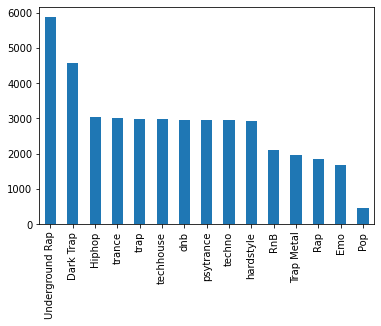

In [108]:
data["genre"].value_counts().plot(kind="bar")

In [109]:
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [110]:
data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [111]:
data = sklearn.utils.shuffle(data)

In [112]:
data.head().T

,10793,28580,8043,17747,2823
danceability,0.463,0.377,0.768,0.686,0.687
energy,0.362,0.982,0.648,0.588,0.835
key,6,6,11,7,11
loudness,-8.533,-11.328,-6.042,-8.343,-6.033
mode,1,0,0,0,0
speechiness,0.143,0.0666,0.188,0.0554,0.0387
acousticness,0.203,4.93e-06,0.045,0.178,0.486
instrumentalness,0.0795,0.901,2.9e-05,0,0.92
liveness,0.1,0.262,0.113,0.0954,0.106
valence,0.0576,0.111,0.358,0.617,0.347


In [113]:
data.shape

(42305, 14)

In [114]:
train_cats(data)

In [115]:
data.genre

10793         Trap Metal
28580             trance
8043     Underground Rap
17747                RnB
2823           Dark Trap
              ...       
30104             trance
3150           Dark Trap
31334          psytrance
25401             techno
3718           Dark Trap
Name: genre, Length: 42305, dtype: category
Categories (15, object): ['Dark Trap' < 'Emo' < 'Hiphop' < 'Pop' ... 'techhouse' < 'techno' < 'trance' < 'trap']

In [116]:
genre = data.genre.cat.categories.tolist()
genre

['Dark Trap',
 'Emo',
 'Hiphop',
 'Pop',
 'Rap',
 'RnB',
 'Trap Metal',
 'Underground Rap',
 'dnb',
 'hardstyle',
 'psytrance',
 'techhouse',
 'techno',
 'trance',
 'trap']

In [117]:
genre_code = data.genre.cat.codes.unique().tolist()
genre_code

[6, 13, 7, 5, 0, 11, 14, 10, 12, 2, 8, 4, 3, 9, 1]

In [118]:
dict_genre = {}
for i in range(len(data.genre.cat.categories.tolist())):
    dict_genre[genre_code[i]] = genre[i]
dict_genre

{6: 'Dark Trap',
 13: 'Emo',
 7: 'Hiphop',
 5: 'Pop',
 0: 'Rap',
 11: 'RnB',
 14: 'Trap Metal',
 10: 'Underground Rap',
 12: 'dnb',
 2: 'hardstyle',
 8: 'psytrance',
 4: 'techhouse',
 3: 'techno',
 9: 'trance',
 1: 'trap'}

In [119]:
data.genre = data.genre.cat.codes

In [120]:
data.head().T

,10793,28580,8043,17747,2823
danceability,0.4630,0.377000,0.768000,0.6860,0.6870
energy,0.3620,0.982000,0.648000,0.5880,0.8350
key,6.0000,6.000000,11.000000,7.0000,11.0000
loudness,-8.5330,-11.328000,-6.042000,-8.3430,-6.0330
mode,1.0000,0.000000,0.000000,0.0000,0.0000
speechiness,0.1430,0.066600,0.188000,0.0554,0.0387
acousticness,0.2030,0.000005,0.045000,0.1780,0.4860
instrumentalness,0.0795,0.901000,0.000029,0.0000,0.9200
liveness,0.1000,0.262000,0.113000,0.0954,0.1060
valence,0.0576,0.111000,0.358000,0.6170,0.3470


In [121]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [122]:
X = data.drop("genre",axis=1)

In [123]:
y = data.genre

In [124]:
n_total = len(data)
n_valid = 20000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 15000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 42305
number of validation data points : 20000
number of training data points : 22305
number of subsampled training points : 15000


In [125]:
X_train, X_valid = split_vals(X, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(X, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (15000, 13), y = (15000,)
Number of full training data points: X = (22305, 13), y = (22305,)
Number of validation data points: X = (20000, 13), y = (20000,)


# Machine Learning Models (KNN & RandomForest Classifier)

## Model 1: KNN Classifier

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [127]:
knn_model.fit(X_train,y_train)
knn_model.predict(X_valid)

array([14,  7,  7, ..., 13, 10,  2], dtype=int8)

In [128]:
knn_model.score(X_train,y_train)


0.4964357767316745

In [129]:
knn_model.score(X_valid,y_valid)

0.27835

In [130]:
knn_model.fit(X_small,y_small)

KNeighborsClassifier()

In [131]:
knn_model.score(X_small,y_small)

0.47713333333333335

In [132]:
knn_model.score(X_valid,y_valid)

0.2576

In [237]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [424]:
#Tuning for KNN model
train_scores=[]
valid_scores=[]
#Create list of different n-neighbors
neighbors = range(1,15)
#Setup KNN instance
knn_model=KNeighborsClassifier()
#Loop through different neigbors
for i in neighbors:
    knn_model.set_params(n_neighbors=i)
    knn_model.fit(X_train,y_train) #Fit the model
    train_scores.append(knn_model.score(X_train,y_train)) #Update the train score list
    valid_scores.append(knn_model.score(X_valid,y_valid)) #Update test scores list

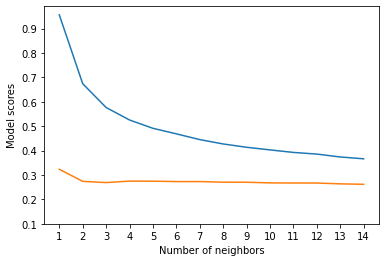

In [425]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,valid_scores,label="Vest scores")
plt.xticks(np.arange(1,15,1))
plt.yticks(np.arange(0.1,1,0.1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend;

After changing the parameter and the sizes of dataset, we could find that even at a level of very high overfitting, KNN model shows poor prediction on train set (score:0.4). We could try to improve KNN model by adjusting the train model, but the effiency and accuracy in the genre prediction of KNN model are poor.

## Model 2: RandomForestRegression Classifer

In [133]:
rf = RandomForestClassifier(oob_score=True,random_state=42)

In [134]:
rf.fit(X_train,y_train)
rf.predict(X_valid)

array([11,  7,  7, ..., 10, 12,  0], dtype=int8)

In [135]:
%time rf.fit(X_train, y_train)

print(rf.score(X_train, y_train)) # classification accuracy on training set
print(rf.score(X_valid, y_valid)) # classification accuracy on validation set
print(rf.oob_score_)                    # classification accuracy on oob samples

CPU times: user 5.43 s, sys: 159 ms, total: 5.59 s
Wall time: 5.67 s
0.9575431517596952
0.6639
0.6601658820892177


In [136]:
%time rf.fit(X_small, y_small)

print(rf.score(X_small, y_small)) # classification accuracy on training set
print(rf.score(X_valid, y_valid)) # classification accuracy on validation set
print(rf.oob_score_)                    # classification accuracy on oob samples

CPU times: user 3.84 s, sys: 137 ms, total: 3.98 s
Wall time: 4.36 s
0.9698666666666667
0.66025
0.6572


It is significantly overfitting! Let's try to further reduce the size of dataset

In [137]:
n_total = len(data)
n_valid = 35000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 5000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 42305
number of validation data points : 35000
number of training data points : 7305
number of subsampled training points : 5000


In [138]:
X_train, X_valid = split_vals(X, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(X, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (5000, 13), y = (5000,)
Number of full training data points: X = (7305, 13), y = (7305,)
Number of validation data points: X = (35000, 13), y = (35000,)


In [139]:
%time rf.fit(X_train, y_train)

print(rf.score(X_train, y_train)) # classification accuracy on training set
print(rf.score(X_valid, y_valid)) # classification accuracy on validation set
print(rf.oob_score_)                    # classification accuracy on oob samples

CPU times: user 1.71 s, sys: 63.3 ms, total: 1.77 s
Wall time: 1.87 s
0.9871321013004791
0.6556571428571428
0.6514715947980835


In [140]:
%time rf.fit(X_small, y_small)

print(rf.score(X_small, y_small)) # classification accuracy on training set
print(rf.score(X_valid, y_valid)) # classification accuracy on validation set
print(rf.oob_score_)                    # classification accuracy on oob samples

CPU times: user 1.36 s, sys: 56.9 ms, total: 1.42 s
Wall time: 1.54 s
0.9928
0.6559142857142857
0.6396


# Hyperparametre Tuning

The change on the size of train set does not increase the accuracy of validation set. So we will see if we could change the hyperparameter to optimize the model. In the following part, we will use the X_train and y_train in line [251]

In [141]:
rf = RandomForestClassifier(
    n_estimators = 20, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 15, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
np.random.seed(42)
grid = RandomizedSearchCV(estimator=RandomForestClassifier(),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [ 1,  3,  5,  7,  9, 11],
                                        'min_samples_split': [ 2,  4,  6,  8, 10, 12],
                                        'n_estimators':[ 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
                                        'max_features': [0.25, 0.5, 0.75]},
                   verbose=True)
grid.fit(X_small,y_small)
#返回最优的训练器
best_estimator = grid.best_estimator_
print(best_estimator)
#输出最优训练器的精度
print(grid.best_score_)

In [142]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)

In [143]:
%time rf.fit(X_small, y_small)

print(rf.score(X_small, y_small)) # classification accuracy on training set
print(rf.score(X_valid, y_valid)) # classification accuracy on validation set
print(rf.oob_score_)                    # classification accuracy on oob samples

CPU times: user 303 ms, sys: 25.6 ms, total: 329 ms
Wall time: 160 ms
0.9778
0.6343428571428571
0.5866


In [144]:
tuned_rf.fit(X_small,y_small)
y_predict_valid = tuned_rf.predict(X_valid)
pred_true = pd.DataFrame(data={"actual":y_valid,"prediction":y_predict_valid})
pred_true.head()

,actual,prediction
37136,8,8
4981,7,7
19725,2,5
4684,7,0
24154,11,11


In [145]:
pred_true["result"]=pred_true["actual"]==pred_true["prediction"]

<AxesSubplot:>

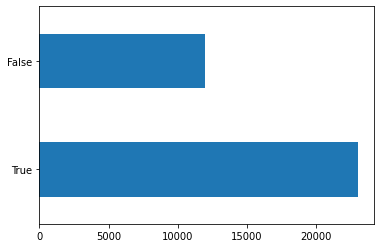

In [146]:
pred_true["result"].value_counts().plot(kind="barh")

In [147]:
from sklearn.metrics import classification_report

In [148]:
print(classification_report(y_valid,y_predict_valid))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49      3780
           1       0.69      0.62      0.65      1431
           2       0.46      0.38      0.42      2530
           3       0.06      0.00      0.01       381
           4       0.75      0.28      0.41      1541
           5       0.39      0.30      0.34      1728
           6       0.46      0.22      0.29      1622
           7       0.41      0.65      0.51      4851
           8       0.93      0.99      0.96      2409
           9       0.80      0.86      0.83      2413
          10       0.90      0.91      0.91      2469
          11       0.85      0.90      0.87      2449
          12       0.85      0.84      0.84      2427
          13       0.80      0.80      0.80      2514
          14       0.80      0.78      0.79      2455

    accuracy                           0.66     35000
   macro avg       0.64      0.60      0.61     35000
weighted avg       0.66   

In [149]:
dict_genre

{6: 'Dark Trap',
 13: 'Emo',
 7: 'Hiphop',
 5: 'Pop',
 0: 'Rap',
 11: 'RnB',
 14: 'Trap Metal',
 10: 'Underground Rap',
 12: 'dnb',
 2: 'hardstyle',
 8: 'psytrance',
 4: 'techhouse',
 3: 'techno',
 9: 'trance',
 1: 'trap'}

!!!!

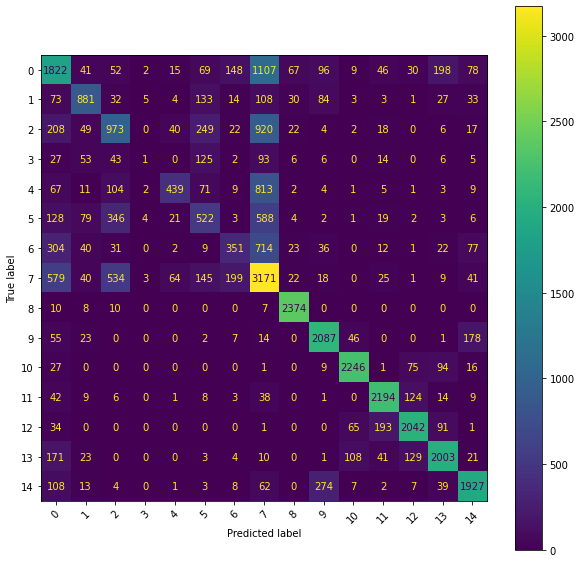

In [150]:
fig, ax = plt.subplots(figsize=(10, 10))

metrics.plot_confusion_matrix(
    tuned_rf, 
    X_valid, 
    y_valid, 
    display_labels = range(15),
    include_values = True, 
    xticks_rotation = 45, 
    values_format = None, 
    cmap = 'viridis', 
    ax = ax,
    colorbar = True,
)

# Feature Importance

In [151]:
def rf_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


def rf_unfolded_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    for i, tree in enumerate(model.estimators_):
        feat_importance['imp_' + str(i)] = tree.feature_importances_
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


# found at
# https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees
def tree_feature_importance(model, normalize = True):

    left_c = model.tree_.children_left
    right_c = model.tree_.children_right

    impurity = model.tree_.impurity    
    node_samples = model.tree_.weighted_n_node_samples 

    # Initialize the feature importance, those not used remain zero
    feature_importance = np.zeros((model.tree_.n_features,))

    for idx, node in enumerate(model.tree_.feature):
        if node >= 0:
            # Accumulate the feature importance over all the nodes where it's used
            feature_importance[node] += (
                impurity[idx]*node_samples[idx] -
                impurity[left_c[idx]]*node_samples[left_c[idx]] -
                impurity[right_c[idx]]*node_samples[right_c[idx]])

    # Number of samples at the root node
    feature_importance /= node_samples[0]

    if normalize:
        normalizer = feature_importance.sum()
        if normalizer > 0:
            feature_importance /= normalizer

    return feature_importance

In [152]:
feat_importance = rf_feat_importance(tuned_rf, X_small)
feat_importance

,cols,imp
10,tempo,0.221366
11,duration_ms,0.126148
7,instrumentalness,0.097131
0,danceability,0.096622
3,loudness,0.086883
1,energy,0.081385
5,speechiness,0.068643
9,valence,0.067713
6,acousticness,0.065646
8,liveness,0.051772


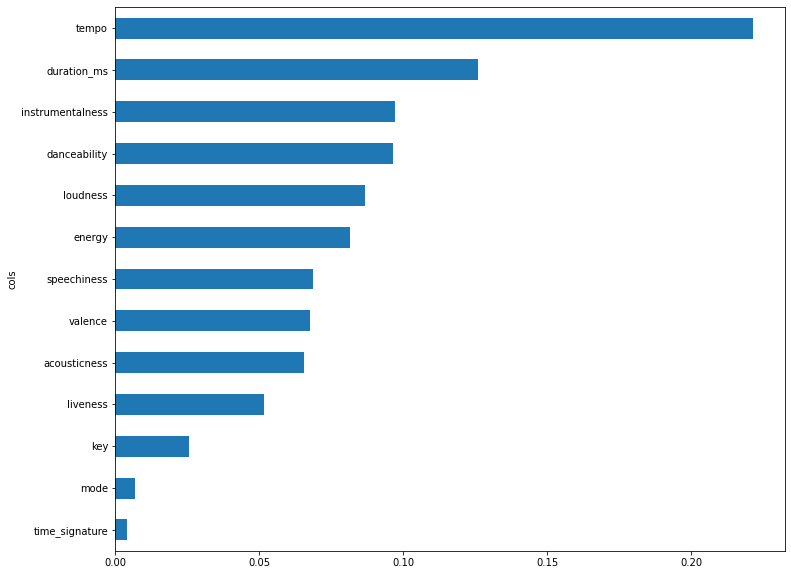

In [153]:
barh = feat_importance.plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
barh = barh.invert_yaxis()
barh

In [154]:
to_keep = feat_importance[feat_importance.imp > 0.05].cols
len(to_keep)

10

In [155]:
df_keep = X[to_keep].copy()


n_total = len(df_keep)
n_valid = 35000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 5000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small_keep.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train_keep.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid_keep.shape, y_valid.shape))

Number of small training data points: X = (5000, 10), y = (5000,)
Number of full training data points: X = (7305, 10), y = (7305,)
Number of validation data points: X = (35000, 10), y = (35000,)


In [156]:
X_train_keep.head().T

,10793,28580,8043,17747,2823
tempo,174.0120,137.946000,194.026000,189.0380,132.0220
duration_ms,175052.0000,277400.000000,188040.000000,249120.0000,174545.0000
instrumentalness,0.0795,0.901000,0.000029,0.0000,0.9200
danceability,0.4630,0.377000,0.768000,0.6860,0.6870
loudness,-8.5330,-11.328000,-6.042000,-8.3430,-6.0330
energy,0.3620,0.982000,0.648000,0.5880,0.8350
speechiness,0.1430,0.066600,0.188000,0.0554,0.0387
valence,0.0576,0.111000,0.358000,0.6170,0.3470
acousticness,0.2030,0.000005,0.045000,0.1780,0.4860
liveness,0.1000,0.262000,0.113000,0.0954,0.1060


In [157]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)
%time tuned_rf.fit(X_small_keep, y_small)
print(tuned_rf.score(X_small_keep, y_small)) # classification accuracy on training set
print(tuned_rf.score(X_valid_keep, y_valid)) # classification accuracy on validation set
print(tuned_rf.oob_score_)                    # classification accuracy on oob samples

CPU times: user 4.32 s, sys: 275 ms, total: 4.59 s
Wall time: 1.73 s
0.986
0.656
0.6574


## Permutation importance

In [366]:
tuned_rf.fit(X_train,y_train)
result = permutation_importance(
    tuned_rf, 
    X_valid, 
    y_valid, 
    n_repeats = 10,
    random_state = 42, n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

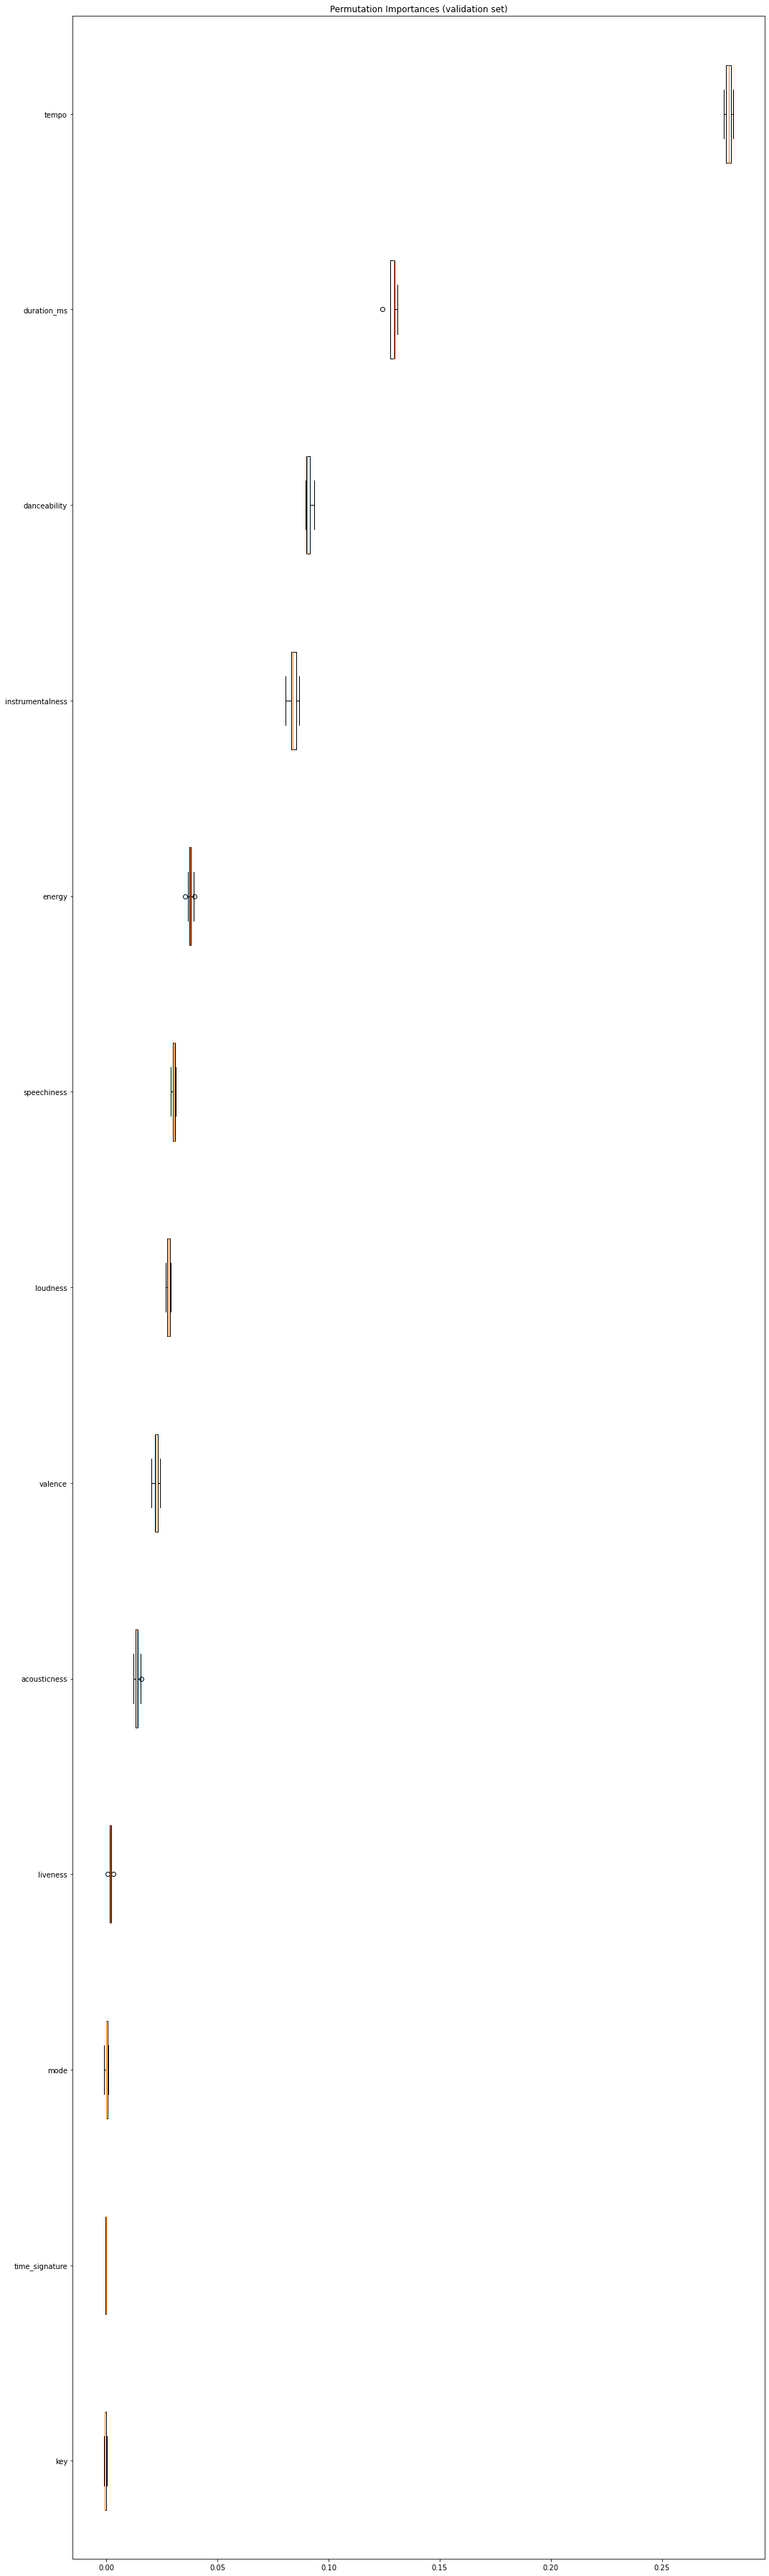

In [368]:
fig, ax = plt.subplots(figsize = (15, 50))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

In [373]:
bool_filter = result.importances_mean > 0.01
bool_filter

array([ True,  True, False,  True, False,  True,  True,  True, False,  True,  True,  True, False])

In [374]:
to_keep = X.columns[bool_filter]
df_keep = X[to_keep].copy()

n_total = len(df_keep)
n_valid = 35000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 5000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)


print('Number of small training data points: X = {}, y = {}'.format(X_small_keep.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train_keep.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid_keep.shape, y_valid.shape))

Number of small training data points: X = (5000, 9), y = (5000,)
Number of full training data points: X = (7305, 9), y = (7305,)
Number of validation data points: X = (35000, 9), y = (35000,)


In [375]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)
%time tuned_rf.fit(X_small_keep, y_small)
print(tuned_rf.score(X_small_keep, y_small)) # classification accuracy on training set
print(tuned_rf.score(X_valid_keep, y_valid)) # classification accuracy on validation set
print(tuned_rf.oob_score_)           

CPU times: user 4.12 s, sys: 268 ms, total: 4.39 s
Wall time: 1.36 s
0.9808
0.6568
0.6498


The result of ablation by the method of permutation method and normal method is the same. They both lead to the deletion of "mode","key" and "time signature". The new dataset appears an increase of 0.02 on the score of validation set and 0.05 on obb score. 

In [378]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)
%time tuned_rf.fit(X_train_keep, y_train)
print(tuned_rf.score(X_train_keep, y_train)) # classification accuracy on training set
print(tuned_rf.score(X_valid_keep, y_valid)) # classification accuracy on validation set
print(tuned_rf.oob_score_)           

CPU times: user 6.02 s, sys: 360 ms, total: 6.38 s
Wall time: 1.65 s
0.9772758384668035
0.6607714285714286
0.6577686516084873


When we tried to fit the model on the whole train set, the level of overfitting decreased and the score of validation set got improved a litle bit. Let's try to increase the size of the train dataset. 

In [383]:
n_total = len(df_keep)
n_valid = 20000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 5000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)


print('Number of small training data points: X = {}, y = {}'.format(X_small_keep.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train_keep.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid_keep.shape, y_valid.shape))

Number of small training data points: X = (5000, 9), y = (5000,)
Number of full training data points: X = (22305, 9), y = (22305,)
Number of validation data points: X = (20000, 9), y = (20000,)


In [384]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)
%time tuned_rf.fit(X_train_keep, y_train)
print(tuned_rf.score(X_train_keep, y_train)) # classification accuracy on training set
print(tuned_rf.score(X_valid_keep, y_valid)) # classification accuracy on validation set
print(tuned_rf.oob_score_)     

CPU times: user 20.2 s, sys: 461 ms, total: 20.7 s
Wall time: 4.19 s
0.9488455503250393
0.6684
0.6625420309347679


In [386]:
n_total = len(df_keep)
n_valid = 15000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 5000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)


print('Number of small training data points: X = {}, y = {}'.format(X_small_keep.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train_keep.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid_keep.shape, y_valid.shape))

Number of small training data points: X = (5000, 9), y = (5000,)
Number of full training data points: X = (27305, 9), y = (27305,)
Number of validation data points: X = (15000, 9), y = (15000,)


In [387]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)
%time tuned_rf.fit(X_train_keep, y_train)
print(tuned_rf.score(X_train_keep, y_train)) # classification accuracy on training set
print(tuned_rf.score(X_valid_keep, y_valid)) # classification accuracy on validation set
print(tuned_rf.oob_score_)     

CPU times: user 25.1 s, sys: 509 ms, total: 25.6 s
Wall time: 4.89 s
0.9420252700970518
0.6686666666666666
0.6629555026551913


After the elimination of features with least importance, the increase of the size of train set could lead to a better score of our model. 

## Correlation

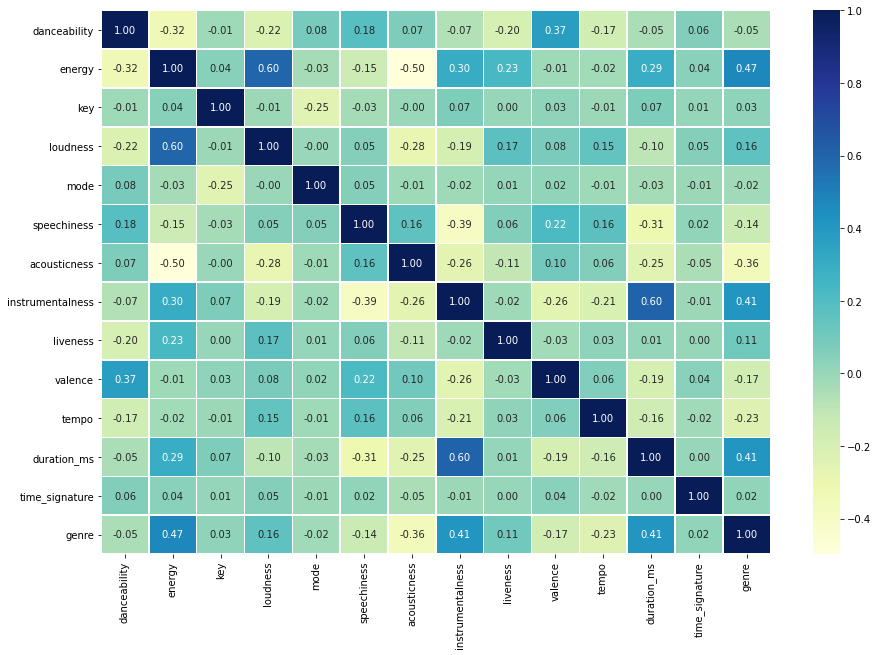

In [385]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

In [400]:
cols = df_keep.columns.tolist()
cols

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'valence',
 'tempo',
 'duration_ms']

In [401]:
corr = np.round(scipy.stats.spearmanr(data[cols]).correlation, 4)
corr.size

81

In [402]:
corr_condensed = hierarchy.distance.squareform(1 - corr)
corr_condensed.size

36

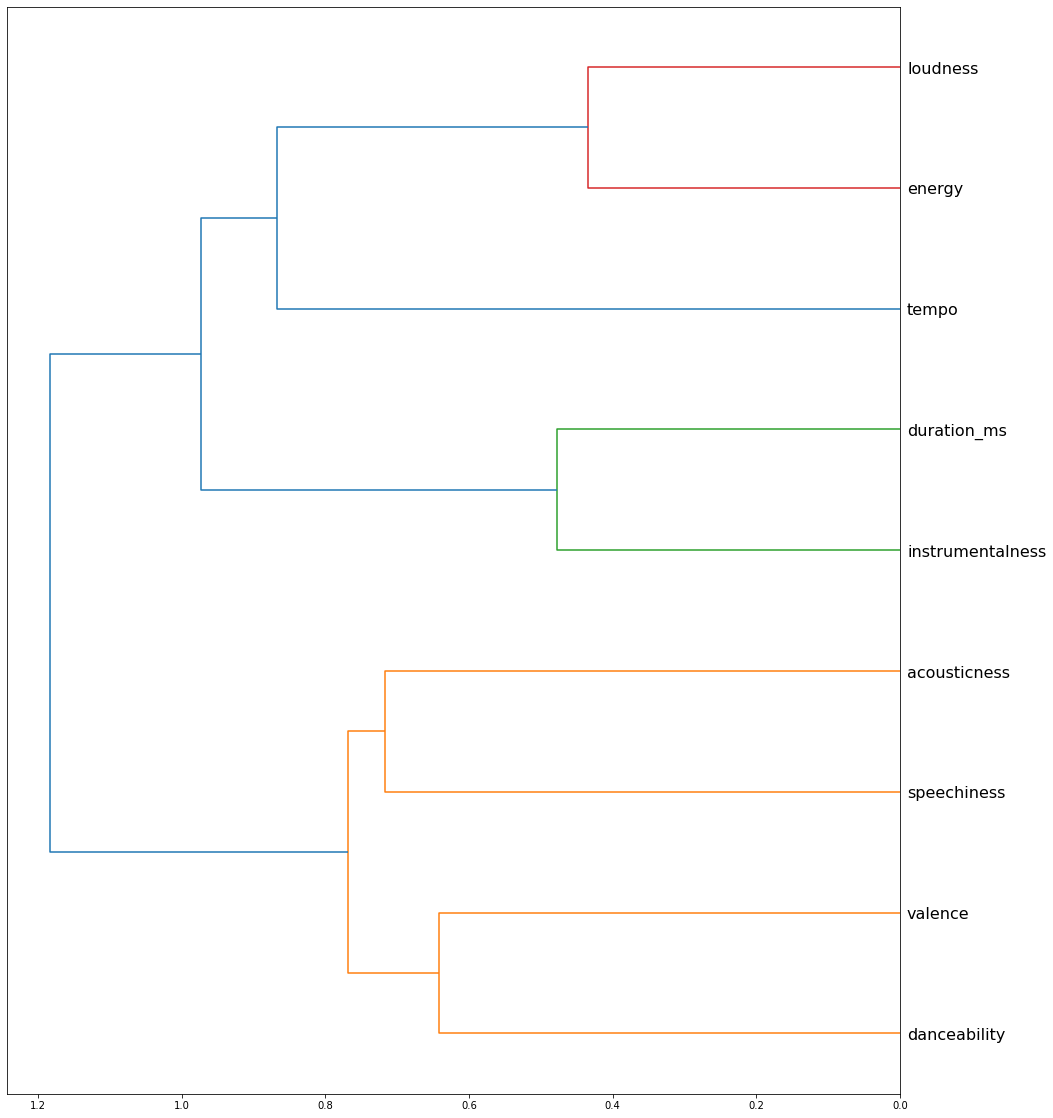

In [403]:
corr_linkage = hierarchy.linkage(corr_condensed, method = 'average')

# compute plot
fig = plt.figure(figsize = (16,20))
dendrogram = hierarchy.dendrogram(
    corr_linkage, 
    labels = cols, 
    orientation = 'left', 
    leaf_font_size = 16,
)
plt.show()

In [404]:
from collections import defaultdict

In [405]:
# compute hierarchical clustering
cluster_ids = hierarchy.fcluster(corr_linkage, 0.1, criterion = 'distance')

# reshape clustering as {cluster_index : feature_index}
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

# keep only first feature for each cluster
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# shift feature index after 62
selected_features = [(i if i < 62 else i+1) for i in selected_features]

# retained set of features
selected_features = [data.columns[i] for i in selected_features]
selected_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness']

We could not find a high correlation between any of two columns.

# Final model and train dataset

In [45]:
tuned_rf = RandomForestClassifier(max_features=0.25,
                                  min_samples_split=6, 
                                  n_estimators=350,
                                  random_state=42,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1)
  

In [158]:
to_keep = feat_importance[feat_importance.imp > 0.05].cols
len(to_keep)

n_total = len(df_keep)
n_valid = 20000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 5000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)


print('Number of small training data points: X = {}, y = {}'.format(X_small_keep.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train_keep.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid_keep.shape, y_valid.shape))

Number of small training data points: X = (5000, 10), y = (5000,)
Number of full training data points: X = (22305, 10), y = (22305,)
Number of validation data points: X = (20000, 10), y = (20000,)


In [159]:
%time tuned_rf.fit(X_train_keep, y_train)
print(tuned_rf.score(X_train_keep, y_train)) # classification accuracy on training set
print(tuned_rf.score(X_valid_keep, y_valid)) # classification accuracy on validation set
print(tuned_rf.oob_score_)   

CPU times: user 21.6 s, sys: 681 ms, total: 22.3 s
Wall time: 6.26 s
0.9508182021968169
0.6641
0.6663976686841515


In [413]:
y_predict_valid = tuned_rf.predict(X_valid_keep)

In [414]:
print(classification_report(y_valid,y_predict_valid))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48      2141
           1       0.71      0.69      0.70       779
           2       0.43      0.42      0.42      1416
           3       0.23      0.04      0.07       210
           4       0.58      0.31      0.40       901
           5       0.43      0.38      0.40       990
           6       0.40      0.22      0.29       960
           7       0.41      0.56      0.47      2792
           8       0.96      0.98      0.97      1396
           9       0.86      0.92      0.89      1378
          10       0.92      0.92      0.92      1435
          11       0.88      0.91      0.89      1384
          12       0.86      0.86      0.86      1424
          13       0.82      0.85      0.83      1401
          14       0.85      0.85      0.85      1393

    accuracy                           0.67     20000
   macro avg       0.65      0.62      0.63     20000
weighted avg       0.67   

In [419]:
dict_genre

{7: 'Dark Trap',
 12: 'Emo',
 11: 'Hiphop',
 10: 'Pop',
 9: 'Rap',
 1: 'RnB',
 13: 'Trap Metal',
 6: 'Underground Rap',
 5: 'dnb',
 14: 'hardstyle',
 8: 'psytrance',
 4: 'techhouse',
 0: 'techno',
 2: 'trance',
 3: 'trap'}

This model has different levels of accuracy on the prediction of different the genres:

High efficacy: Psytrance / Rap / Pop / Hiphop / Emo / Trap Metal / hardstyle

Medium efficacy: RnB / techhouse

Low efficacy: techno / trance / dnb / Dark Trap / Underground Rap / trap

In the following research, we might need to explore more features of genres of low efficacy for the model to better identify them. 

# Preparation for Streamlit demonstrator

In [169]:
df_keep.head().T

,10793,28580,8043,17747,2823
tempo,174.0120,137.946000,194.026000,189.0380,132.0220
duration_ms,175052.0000,277400.000000,188040.000000,249120.0000,174545.0000
instrumentalness,0.0795,0.901000,0.000029,0.0000,0.9200
danceability,0.4630,0.377000,0.768000,0.6860,0.6870
loudness,-8.5330,-11.328000,-6.042000,-8.3430,-6.0330
energy,0.3620,0.982000,0.648000,0.5880,0.8350
speechiness,0.1430,0.066600,0.188000,0.0554,0.0387
valence,0.0576,0.111000,0.358000,0.6170,0.3470
acousticness,0.2030,0.000005,0.045000,0.1780,0.4860
liveness,0.1000,0.262000,0.113000,0.0954,0.1060


In [174]:
final_dataset = df_keep.copy()
final_dataset["genre"] = data["genre"]

In [179]:
path_to_data2 = os.path.join(path_to_repo,"data","archive","genre_V3")
final_dataset.to_csv(path_to_data2 + '.csv', index = False)

In [176]:
final_dataset.columns

Index(['tempo', 'duration_ms', 'instrumentalness', 'danceability', 'loudness',
       'energy', 'speechiness', 'valence', 'acousticness', 'liveness',
       'genre'],
      dtype='object')

In [161]:
# save model on disk
path_to_model = os.path.join(path_to_repo, 'app Streamlit', 'saves', 'RF_classifier.pk')
with open(path_to_model, 'wb') as file:
    dill.dump(tuned_rf, file) 